In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()
df.describe()
df['Attrition'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [4]:
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

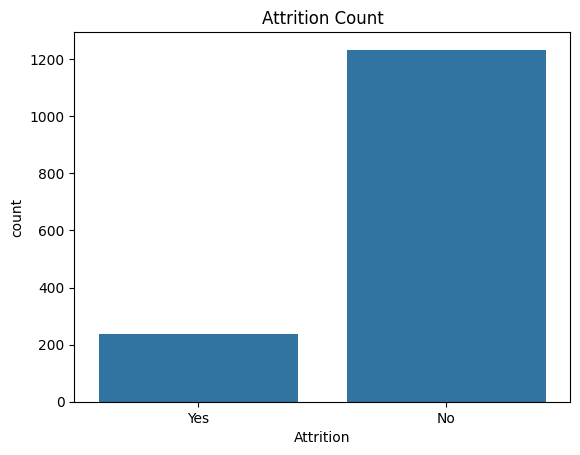

In [5]:
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Count")
plt.show()


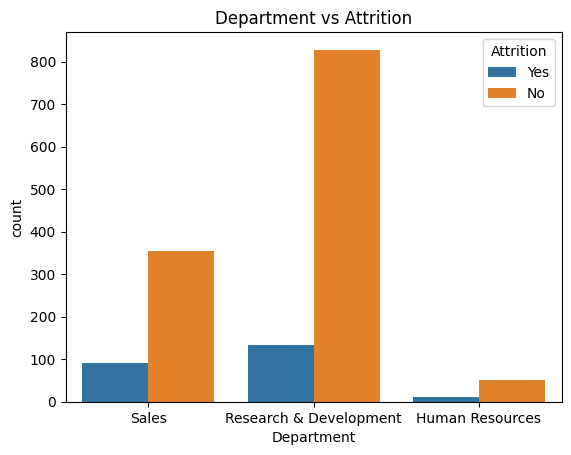

In [6]:
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Department vs Attrition")
plt.show()


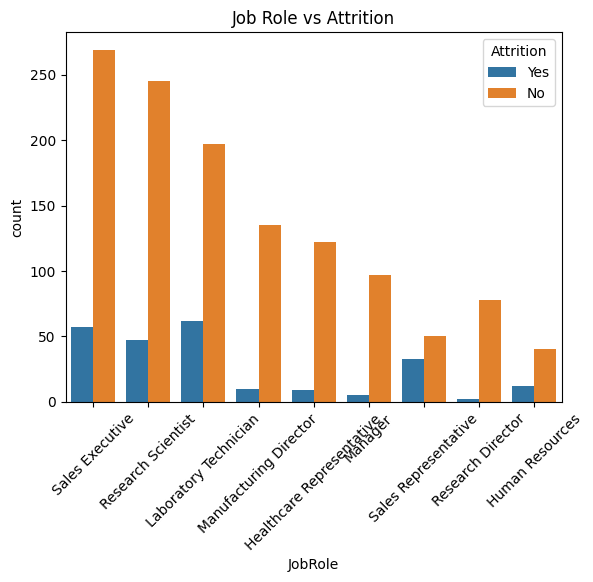

In [7]:
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title("Job Role vs Attrition")
plt.xticks(rotation=45)
plt.show()


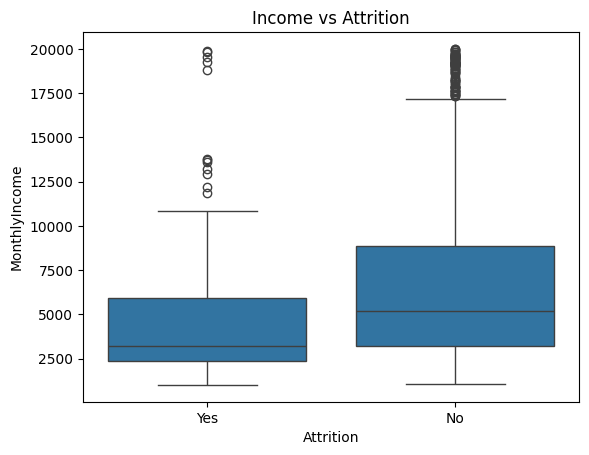

In [8]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Income vs Attrition")
plt.show()


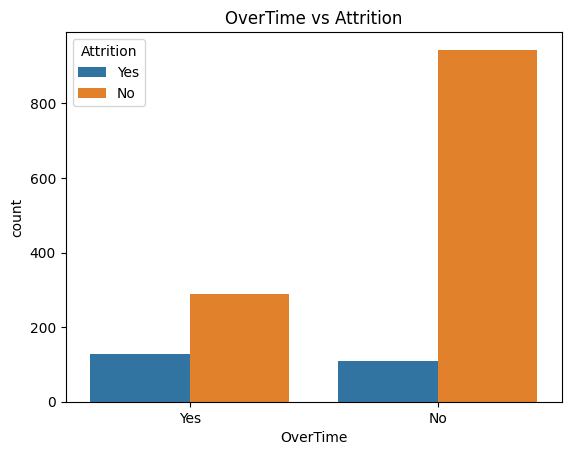

In [9]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("OverTime vs Attrition")
plt.show()


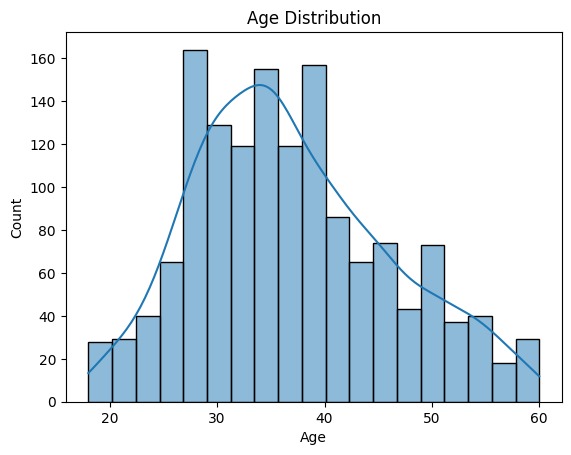

In [10]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])  # No = 0, Yes = 1
df['OverTime'] = le.fit_transform(df['OverTime'])
df['Gender'] = le.fit_transform(df['Gender'])


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [16]:
df_model = df.copy()
le = LabelEncoder()
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = le.fit_transform(df_model[col])

# Features & label
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

# Final split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())


X_train shape: (1176, 34)
X_test shape: (294, 34)
y_train distribution:
 Attrition
0    986
1    190
Name: count, dtype: int64
y_test distribution:
 Attrition
0    247
1     47
Name: count, dtype: int64


In [23]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)




In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("🔷 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


🔷 Logistic Regression
Accuracy: 0.8741496598639455
Confusion Matrix:
 [[239   8]
 [ 29  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294



In [24]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print("🔶 Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


🔶 Decision Tree
Accuracy: 0.7619047619047619
Confusion Matrix:
 [[209  38]
 [ 32  15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       247
           1       0.28      0.32      0.30        47

    accuracy                           0.76       294
   macro avg       0.58      0.58      0.58       294
weighted avg       0.77      0.76      0.77       294



In [25]:
!pip install shap
import shap
import matplotlib.pyplot as plt


In [26]:
explainer = shap.Explainer(lr_model, X_train_scaled)
shap_values = explainer(X_test_scaled)


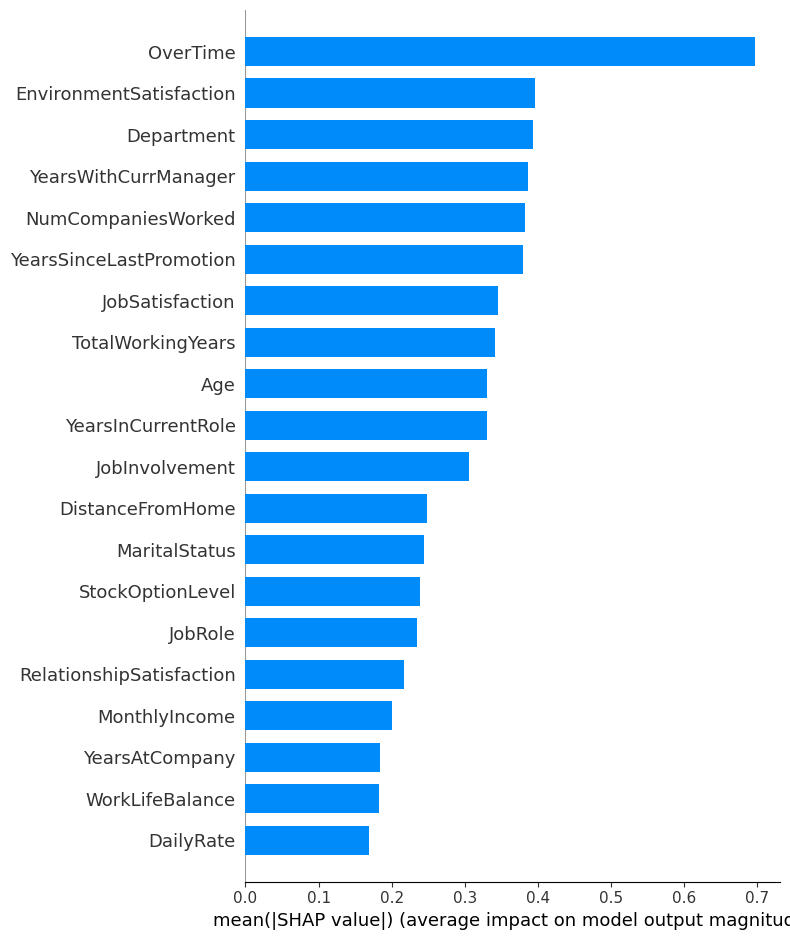

In [28]:
shap.summary_plot(shap_values, features=X_test_scaled, feature_names=X_test.columns, plot_type="bar")



In [30]:
shap.initjs()
index = 5  # you can change this
shap.force_plot(
    explainer.expected_value,
    shap_values[index].values,
    X_test.iloc[index]
)


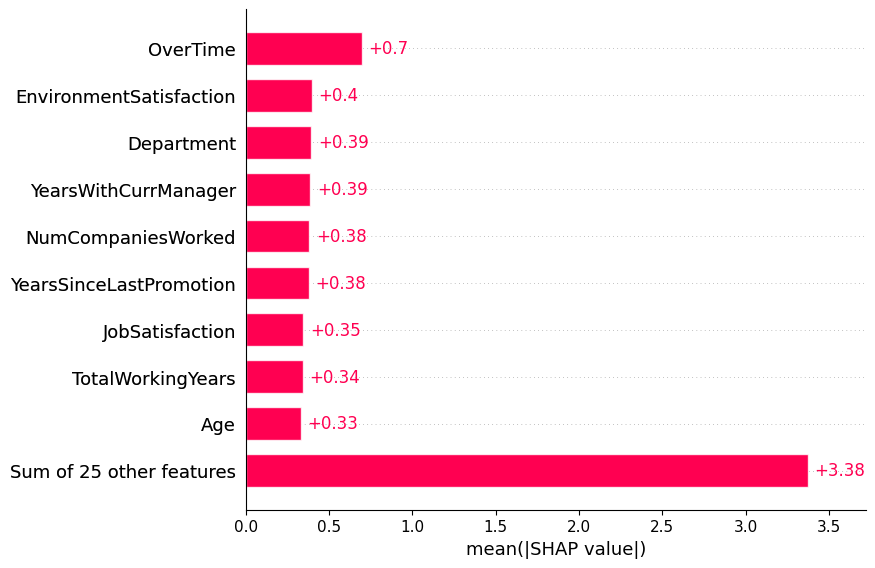

In [33]:
# Rebuild SHAP Explanation with feature names attached
shap_values = shap.Explanation(
    values=shap_values.values,
    base_values=shap_values.base_values,
    data=X_test_scaled,
    feature_names=X_test.columns
)
shap.plots.bar(shap_values)
